# Project 3 Yunseok Jang

1) Apply dimension reduction methods – specifically a PCA – to the data in columns 421-474. As laid out above, these columns contain self-report answers to personality and how these individuals experience movies, respectively. It is us to you whether you do one PCA each for personality and movie experience, or one overall, but regardless of that, we would like you to:

a) Determine the number of factors (principal components) that you will interpret meaningfully (by a criterion of your choice – but make sure to name that criterion). Include a Scree plot in your answer.

b) Semantically interpret what those factors represent (hint: Inspect the loadings matrix).

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


df1 = pd.read_csv('.\movieReplicationSet.csv')
df2 = np.genfromtxt('.\movieReplicationSet.csv', delimiter = ',', skip_header = 1)


data = df1.iloc[:,420:474]
avg = data.mean(axis = 0, skipna = True)

data.fillna(avg, inplace = True)

print(data)

      Is talkative  Tends to find fault with others  Does a thorough job  \
0              1.0                              2.0              4.04912   
1              2.0                              3.0              4.00000   
2              4.0                              2.0              4.00000   
3              5.0                              3.0              5.00000   
4              4.0                              4.0              4.00000   
...            ...                              ...                  ...   
1092           4.0                              4.0              4.00000   
1093           5.0                              5.0              5.00000   
1094           4.0                              2.0              5.00000   
1095           4.0                              2.0              4.00000   
1096           5.0                              4.0              5.00000   

      Is depressed/Blue  Is original/comes up with new ideas  Is reserved  \
0         

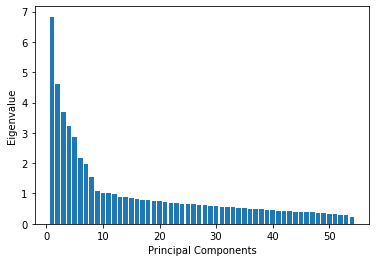

In [32]:
# process of PCA

z = stats.zscore(data)


pca = PCA().fit(z)

e_val = pca.explained_variance_

loading = pca.components_

plt.bar(np.linspace(1,54,54),e_val)
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Components')
plt.show()


In [8]:
# Going with Elbow Criterion
# We see a sharp decrease between second and third eigenvalues
# Take the first two eigenvalues
# redefine PCA with 2 components

pca_n  = PCA(n_components=2).fit(z)

e_val_n = pca_n.explained_variance_

loading = pca_n.components_

print(np.shape(loading))




(2, 54)


In [21]:
# transform the data based on PCA

trans_data = pca_n.fit_transform(z)*(-1)

print(np.shape(trans_data))

(1097, 2)


In [22]:
# Semantic Interpretation of the loading data
print('These two components provide the direction that accounts for the maximum variance of data')
print('Each coordinate of the component represent the importance of the 54 features in the following direction')

print(loading)





These two components provide the direction that accounts for the maximum variance of data
Each coordinate of the component represent the importance of the 54 features in the following direction
[[-0.17916144  0.10433875 -0.18544049  0.18683952 -0.17162177  0.14523753
  -0.17214611  0.10896315 -0.16319405 -0.15658475 -0.23887432  0.05767254
  -0.1759438   0.0968417  -0.12187786 -0.2353244  -0.12106965  0.11172749
   0.10363057 -0.09603448  0.16693482 -0.12946089  0.14169429 -0.15135711
  -0.16754789 -0.1513339   0.15337861 -0.16734955  0.10177907 -0.10907262
   0.1417772  -0.17323032 -0.19072234 -0.16864314  0.029154   -0.22778914
   0.09897917 -0.15443611  0.12643092 -0.13692426  0.05286576 -0.13927628
   0.09150098 -0.09518713 -0.03509121  0.08413978  0.09786819 -0.02556874
  -0.03660916  0.09666058 -0.05166916 -0.06704434 -0.03366556  0.0297833 ]
 [-0.0980929  -0.07546394 -0.0426112  -0.18608491 -0.13018979 -0.0078277
  -0.02046039 -0.08988488  0.18826278 -0.15290268 -0.05082973 -0.0

2) Plot the data from columns 421-474 in the new coordinate system, where each dot represents a person, and the axes represent the factors you found in 1). Hint: If you identified more than 2 meaningful factors, it is a good idea to create several 2D (X vs. Y) subplots for better interpretability

Text(0, 0.5, 'Second maximal direction wise')

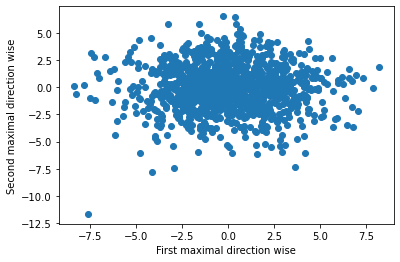

In [23]:
# Plotting of the translated data in new coordinate system
plt.scatter(trans_data[:,0],trans_data[:,1])
plt.xlabel('First maximal direction wise')
plt.ylabel('Second maximal direction wise')




3) Identify clusters in this new space. Use a method of your choice (e.g. kMeans, DBScan, hierarchical clustering) to do so. Determine the optimal number of clusters and identify which cluster a given user is part of.

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import seaborn as sns
import sklearn.cluster as cluster

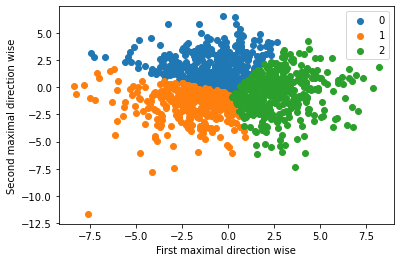

In [27]:
# conducting a preliminary clustering
# kmeans 3 clustering

kMeans = KMeans(n_clusters = 3)

label = kMeans.fit_predict(trans_data)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(trans_data[label==i,0],trans_data[label==i,1],label = i)
plt.legend()
plt.xlabel('First maximal direction wise')
plt.ylabel('Second maximal direction wise')
plt.show()




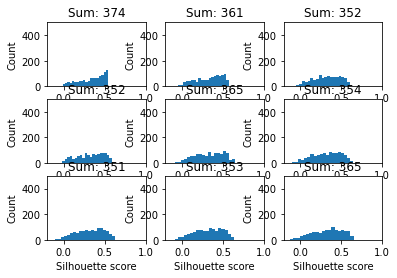

In [28]:
# Sillhoette method of finding optimal 
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(trans_data) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(trans_data,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,500)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer

Text(0, 0.5, 'Sum of silhouette scores')

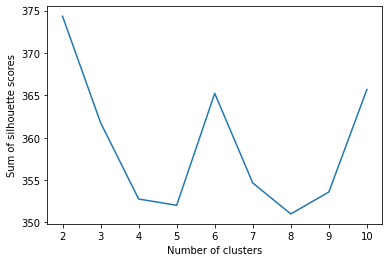

In [29]:
plt.plot(np.linspace(2,10,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')

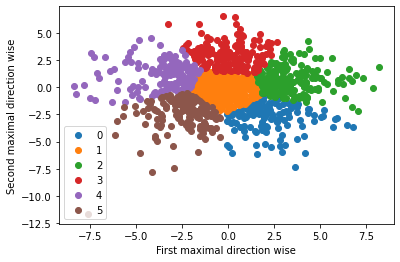

In [30]:
# Aside from choosing the 1 cluster
# 6 seems like a reasonable cluster to consider
kMeans = KMeans(n_clusters = 6)

label = kMeans.fit_predict(trans_data)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(trans_data[label==i,0],trans_data[label==i,1],label = i)
plt.legend()
plt.xlabel('First maximal direction wise')
plt.ylabel('Second maximal direction wise')
plt.show()

4) Use these principal components and/or clusters you identified to build a classification model of your choice (e.g. logistic regression, kNN, SVM, random forest), where you predict the movie ratings of all movies from the personality factors identified before. Make sure to use cross-validation methods to avoid overfitting and assess the accuracy of your model by stating its AUC.

In [52]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

movie_data = df1.iloc[:,:400]

avg = movie_data.mean(axis = 0, skipna = True)

movie_data.fillna(avg, inplace = True)

# Artificially setting the movie ratings into two classification
# 0-3 Not high
# 4-5 Rated high

movie_data = movie_data.to_numpy()
movie_data[movie_data<4] = 0
movie_data[movie_data>= 4] = 1




print(np.shape(movie_data))
print(movie_data)



(1097, 400)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [77]:
from sklearn import linear_model
from scipy.special import expit
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(trans_data[:,0], movie_data[:,0], test_size=0.2)

def mean_squared_loss(y_pred,y):
    """
    mean squared error
    """
    return np.sum((y_pred - y)**2)/(2*len(y))

regressor=linear_model.LogisticRegression(C=1e5).fit(X_train, y_train)
preds=regressor.predict(X_test)



ValueError: Expected 2D array, got 1D array instead:
array=[-5.17397411e+00 -1.54016734e+00 -4.96572180e-03  2.97392649e-02
 -2.03120198e+00 -3.33898175e+00  3.38319553e+00  3.82031635e-01
  9.54955181e-01  2.18668328e+00  4.31374266e+00  2.32894337e+00
 -2.38487185e+00 -2.24563264e+00 -5.93844434e-01  1.36617233e+00
  3.93967120e+00  8.53336895e-01  1.24352814e+00 -2.11840659e+00
  1.97795502e+00 -4.49866769e-01  1.33181932e+00 -2.53686074e+00
  6.17135470e-02 -2.21320283e-01 -5.93812078e-01 -5.45440319e-02
 -6.20232113e+00  4.11043565e+00  3.79962208e+00  2.69367479e-01
 -6.49257740e-01 -1.18440034e+00  7.52571559e-01  1.46658816e+00
 -2.88770181e+00 -2.43173034e+00  5.28106614e-01  3.00166577e+00
  2.14762166e+00  2.32920654e+00  2.64857167e+00 -2.65477214e+00
 -2.49231922e+00  5.41090761e-01  4.54797516e-01 -1.84395717e+00
 -4.97004297e+00 -5.87310242e-01  5.72372569e+00 -2.03867454e+00
 -6.18479543e-01  1.64280083e+00 -4.20471197e-01 -1.06742036e-01
 -2.71749112e+00 -1.40599732e+00  1.01229311e+00  2.58436700e+00
 -2.99001013e+00  1.03050172e+00  3.35074794e-02  7.86547698e+00
  8.58283588e-01 -1.48971396e+00  1.03689143e-16  2.27721461e+00
  2.96891854e+00 -5.86729791e-01 -3.46526697e+00  3.89519325e+00
 -1.27726895e-01  8.51866955e-01 -9.33521746e-02 -1.85793807e+00
  6.01022341e-01  3.52074927e+00 -3.72632543e-01  9.52564849e-01
 -1.68662624e+00  3.42056494e+00  1.08955757e+00 -1.14887058e+00
  2.91365846e+00 -2.08609411e+00  8.45386607e-01  1.69932242e+00
  3.17016516e+00  8.17954916e+00  6.19727662e-01  4.57971238e+00
  7.93837769e-02  1.77381026e+00  1.74505757e-01 -2.09235274e+00
  3.06584549e+00  3.85139785e-01 -4.34006646e-02  9.30251682e-01
  1.48532290e+00 -3.60241863e+00  2.21768588e+00 -7.15821865e-01
 -3.00097067e+00  4.32758031e+00  5.02106926e+00  1.32261694e+00
 -4.61158240e-01  1.11445496e+00  5.96199370e-01 -2.24751597e+00
  2.26835294e+00 -3.18740630e+00  4.41661566e+00 -3.21995746e+00
 -8.25537707e+00  4.23661177e+00 -1.16876101e+00 -2.20439223e+00
  8.74907041e-01  8.79848601e-01 -4.87449966e+00 -1.05376055e+00
 -2.45228647e+00  4.71597942e+00  1.19968424e+00 -3.62617316e+00
 -2.67440278e+00 -2.48068545e+00 -7.14752818e-01  2.99804455e+00
 -2.50298893e+00 -9.22437561e-01 -1.25032758e+00  1.18547670e+00
  7.36978115e-01  1.37487838e-01 -3.89045300e-01  2.84526008e+00
 -3.35793738e-01 -6.42893794e-01  8.75116369e-01  4.95977702e-01
 -3.66787222e+00  1.19590889e+00  4.85619960e-02 -3.29751958e+00
 -2.13726977e+00  2.70976861e+00 -4.24996844e+00 -1.74441208e-01
 -1.99300088e+00  2.24917759e+00  1.86560494e+00  5.08088698e+00
  3.67768617e-01  2.62559694e+00  3.50956137e+00  4.20054468e+00
  9.13961694e-02  3.07129715e+00 -3.72808550e+00 -2.91426019e+00
 -4.22428428e+00  3.01617460e+00 -5.90585815e-01  2.78627201e+00
 -7.56688036e-01 -9.60501989e-01 -1.94128039e+00 -1.44062011e+00
 -1.38183367e+00 -1.03024658e+00  1.58243672e+00 -2.23877179e+00
  1.65686911e+00 -2.83675633e+00 -1.82279134e+00 -2.82504028e+00
  1.90342635e+00 -1.28396553e+00 -4.17974001e-01 -2.26880665e+00
 -3.05163795e-01  2.23771340e+00 -1.82193437e+00  1.84023409e+00
  9.49767279e-01 -1.86066585e+00  2.26907490e-01  3.43917950e-01
 -2.80085285e+00  5.22821724e+00 -2.70447458e+00  2.43795196e+00
  2.72241980e+00  3.26047433e-01  3.97382056e+00 -2.19429820e+00
  4.82748107e+00  4.73064718e+00 -2.18245249e+00  4.20289101e+00
  1.48976342e+00  4.37660254e-01 -4.28823776e-01  1.95343642e+00
  1.95916017e+00 -1.94386878e+00  1.03689143e-16 -3.21491980e+00
  3.23568296e+00 -2.40917379e+00 -1.54503262e+00 -4.94855818e-02
 -3.27608092e+00 -8.60023638e-01 -2.48279001e-01  2.93210178e+00
 -5.04387905e+00  6.34341739e-01 -3.27520056e+00  2.91672521e+00
 -3.38761356e+00 -7.31081638e-01 -8.42925719e-01  2.81351039e+00
  1.68989074e+00 -2.73514765e+00  4.09798144e+00 -1.25134973e+00
 -2.38870617e+00 -1.63696969e+00  1.60515284e+00  3.11546119e+00
 -1.17656736e+00 -5.53466532e-01 -1.69252840e+00  1.84725291e+00
  2.17528698e+00 -8.51953958e-02 -1.95790458e+00  5.74142159e-01
 -6.29978575e-01 -2.57301406e+00  2.93927888e+00  6.40207647e-01
 -7.22413409e+00 -1.64126555e+00 -2.49243267e+00 -3.84759988e+00
  1.99096912e+00  2.78369593e+00 -1.51111519e+00 -3.98240772e-01
  1.75728287e+00 -1.41874982e+00  1.80619366e+00 -2.93314620e+00
 -3.43674814e+00  2.96131687e+00 -2.30963349e+00  2.22678690e+00
 -2.00357300e+00  2.42052916e+00 -3.28514138e+00  9.82271616e-01
 -2.38165556e+00  3.74923892e+00  1.92770726e+00 -1.03189129e+00
  5.04857034e+00  1.53365049e+00 -2.12692866e+00 -4.54809368e+00
 -2.46076971e+00  4.28115563e+00 -1.38120045e+00 -7.10933443e-01
 -1.74119155e+00 -1.66827619e+00  9.22922720e-01  6.79552718e+00
 -2.26577563e+00 -2.71907471e+00  2.79083404e+00 -1.84681975e+00
  1.35817757e+00  5.00949822e+00 -2.07152624e-01  1.82098585e+00
 -1.66524059e-01  1.03689143e-16  3.38405751e+00  3.65166578e+00
 -2.75357468e+00  3.36156847e+00 -1.27865417e+00  7.77790733e-01
  2.65387062e+00 -1.54539333e+00 -3.23917314e-01 -4.79333685e-01
 -9.31083373e-01 -3.21143594e+00 -3.55311009e+00  5.07935225e-01
  1.96669059e+00 -4.91216536e+00 -3.90327525e+00 -1.86693045e+00
  4.97467100e-01  1.34932824e+00 -8.35170049e-01 -2.73883004e+00
 -1.12891371e+00 -2.23850247e+00 -2.89336311e+00 -3.69899574e+00
  3.85645044e+00 -2.59572917e+00  4.12157588e+00 -2.59518624e+00
  1.97344324e+00  6.70809990e-01  1.39004388e+00 -1.24182667e+00
 -1.64969311e+00 -3.02236777e-01  1.03689143e-16 -1.36311057e+00
  2.74282821e+00 -8.94282849e-01 -6.72463588e+00  2.58608900e+00
 -2.00394043e-01 -6.16820594e+00 -5.63888814e+00  3.21621482e-01
  1.00273549e+00  1.63401701e+00 -2.80654771e-01  1.38080583e+00
  1.07358738e+00 -5.30880578e+00 -4.81587007e+00  1.93989460e+00
 -3.62968407e+00  3.06520600e-01 -3.99152153e+00 -1.10066639e+00
 -1.23958956e+00  2.38284304e+00  4.06728314e+00 -7.84698519e+00
  2.73838545e+00  4.89929305e+00 -2.23762513e+00 -1.34762415e+00
  4.56924224e-01 -1.44312279e+00 -1.05727389e+00  4.26118403e+00
 -2.48807251e-01  3.18276141e+00 -1.20101967e+00  1.60865779e+00
  2.83610735e+00 -2.51168006e-01  1.21635178e+00 -2.18459074e+00
  8.28839998e-01  1.63453073e-01  1.03689143e-16  2.72723794e+00
  6.21050932e+00  1.97849323e+00 -9.66472156e-01  6.95841450e+00
  5.97695303e-01 -2.20618293e+00 -1.67565650e+00  1.86758284e-02
  3.31125120e+00  3.86396914e+00 -2.26789497e+00  4.60575216e-01
 -2.37444837e+00  1.52060852e+00  3.84692927e+00 -2.62111807e+00
 -2.31630374e+00 -1.54755218e+00 -1.05240470e+00 -3.33344560e-02
  4.30604137e+00 -4.78889990e-02 -5.61807354e+00  2.39936429e-01
  8.15518559e-01  1.97715684e+00  3.54276343e+00  2.41145490e+00
  9.67184559e-02  7.93237707e-01 -6.83220545e-02 -1.11764651e+00
  1.54566267e+00  1.13275570e+00  1.48960594e-01  1.15495394e+00
 -7.48984274e-01  2.90539722e+00  2.99443946e+00  2.14394475e+00
 -1.00077315e+00 -6.33523041e+00 -1.65210085e+00  1.33951033e+00
  2.94428967e+00 -5.54478096e-01 -1.13180427e-01  3.40226342e+00
  1.83409239e+00 -5.54196488e-01 -3.41394195e+00  3.97433166e-01
  1.93275685e+00  1.03603332e+00 -2.67693172e+00 -1.45475447e+00
  6.75016656e+00 -2.89628879e+00  1.45300972e+00  2.04403464e+00
  2.81746509e+00 -4.06073827e+00  3.18902596e+00  2.18774278e-02
 -1.47907022e+00  4.37899550e-01  2.41359318e+00  2.35651448e+00
 -4.10947668e-01 -2.35096047e+00 -2.37445685e-01 -1.17764442e+00
 -2.88323334e+00 -1.92650066e+00  1.57782642e+00  2.57827430e-01
  2.65703635e+00 -1.00296764e+00 -1.94947885e+00 -3.13655846e-01
  4.32229613e+00 -1.21558914e+00 -1.55812546e+00 -4.54784850e+00
 -2.05209605e-01  9.11608998e-01  4.31277291e+00 -5.26184185e-01
 -2.73727905e+00 -3.53519210e+00  1.63330954e+00 -3.73888954e+00
 -3.99931113e+00  9.30707227e-01 -3.27072500e+00 -1.05239286e+00
 -3.75413179e+00 -2.80586015e+00  1.54225506e+00 -3.68447710e+00
  3.97301851e-01  2.73374065e+00  2.62585087e+00 -3.26698752e+00
  7.79803148e-01 -5.25508833e+00  1.61542135e+00  4.24464592e+00
 -1.66417603e+00  4.34427852e+00  3.89061686e-01  2.38522989e+00
  2.45367838e-01  1.67516140e+00  1.03689143e-16 -4.17115005e+00
 -6.38619113e-01  1.06013289e+00  3.50206833e-01 -2.29597933e+00
  3.02303287e+00 -6.03503545e+00  4.64086171e+00  3.08533483e+00
 -2.50489768e-01  1.50426689e+00  9.75596026e-01  7.04630279e+00
 -2.47672540e+00 -2.17922354e+00 -1.25482698e+00 -2.64764358e+00
 -6.39186464e-01  4.43205966e-01  2.12546716e+00 -4.26163008e-01
  1.64509361e+00 -7.46901552e-01  3.82569268e+00 -2.97226522e+00
  1.94267974e+00 -7.78959713e-01  1.46642444e+00  3.21629141e-01
 -9.31432930e-01  3.71425371e+00  2.41716764e+00 -1.87235061e+00
 -7.61901442e-02 -6.97070882e-01 -8.98535530e-02  2.21382799e+00
  9.63775900e-02 -5.48332712e-01 -9.06552916e-01 -2.77240986e+00
  5.36100761e-01  2.03849401e+00  2.57589434e+00 -3.69796652e+00
  1.25261048e+00 -6.60876391e-02 -3.86090617e+00 -3.06328951e+00
 -5.69927075e+00 -1.08745777e+00  1.72872679e+00 -3.48372325e+00
 -1.61274834e-01 -1.22811905e+00 -1.65431388e+00  6.56827931e+00
  7.22676173e-01 -2.51333881e+00 -3.10362910e+00  2.16106489e-01
 -1.59544805e+00  7.35902519e+00 -1.10823187e+00 -2.52272820e-01
  9.57757121e-01  2.09011015e+00 -6.46971784e-01  1.04289767e+00
 -3.40176063e+00 -1.84467947e+00  3.31927069e-01  1.37698969e+00
 -8.38078140e+00  3.22800624e+00 -2.18689997e+00  1.57275458e+00
 -6.77701330e-02  4.49274808e+00 -4.34968912e+00  3.01087556e+00
 -3.53182471e+00  2.30291966e+00 -9.42916302e-01 -2.04566606e+00
 -1.10520332e-01  7.30461076e-01 -1.10631070e+00  2.91823600e+00
 -3.71894230e+00 -3.11601001e+00  1.98488433e+00  4.00106453e+00
  2.57319960e+00  6.95827920e-01  3.98855005e-01 -1.57757858e+00
  1.57214186e+00 -1.17820554e+00 -3.23182816e+00  6.49056916e+00
  8.68850784e-01  5.99880302e+00 -7.60316358e+00  3.37886083e+00
  1.48668879e+00  1.17112141e+00  1.30749049e+00 -6.41253472e+00
  1.58182191e-01 -1.33552676e+00 -5.15834266e-01  4.59842736e-01
 -6.04884986e-02 -1.37565060e+00 -6.42938034e-01 -1.60744741e-01
 -3.95240196e-01 -4.84214325e-01  2.44666725e+00 -1.20524706e+00
 -3.54771373e-01 -2.77599092e+00 -4.80022353e+00  3.73445716e+00
  1.52108380e+00  3.89967102e+00  1.64234806e-01 -5.34823172e+00
  2.33160825e-01  2.31575015e+00  1.03689143e-16  2.55057151e+00
 -1.21338028e+00 -5.04259259e-02 -1.00104486e+00 -1.51639225e+00
 -4.99504713e+00 -2.67830561e+00  1.28504972e+00  3.24927956e+00
  7.33346597e-01 -1.51226872e+00  6.58577900e+00  4.07382400e+00
 -6.68836981e-01  3.08569037e-01  1.42725284e+00  6.70899472e+00
 -2.33606217e-01  9.31586416e-01 -1.22848250e+00 -4.85097713e+00
 -1.72688759e+00  1.93762243e+00  1.08474360e+00 -1.36148843e+00
 -7.20961191e-01  6.29374145e-01 -1.53517522e+00 -4.00134354e-01
  1.11354121e+00 -4.19900785e+00 -5.05877691e-01 -1.08838972e+00
  1.82484336e+00 -7.62046263e-01 -1.96501792e+00  2.44680341e+00
  2.53284654e+00 -4.12263050e+00  2.07159509e+00 -4.71137387e-01
  1.76258051e+00  6.23854551e-01 -3.37753888e+00  3.60361682e+00
  2.08721725e+00  2.22579654e+00  3.38347189e+00  1.25944836e+00
  1.03817830e+00  6.37711641e+00 -6.00835637e+00 -1.48987936e+00
 -7.47290933e+00 -6.03431847e+00  6.72146738e-01  5.70709464e+00
  6.08836253e-01  4.46092862e+00  3.50804599e+00  1.21614320e+00
  2.38477533e+00  4.25292895e-02  1.75818208e+00 -2.25116497e+00
 -3.05117988e+00  1.76280438e+00  2.51998444e+00  3.90553411e-02
  1.11268882e+00  3.57141984e+00 -1.91879603e+00  2.04322184e+00
  1.91348046e+00  2.05952248e+00 -1.36631590e+00 -2.17565270e+00
 -2.78379593e+00 -3.87660590e+00  2.42584194e-01 -7.48158955e-01
  3.00459297e+00  1.87696316e+00  2.75657212e+00  4.73887855e+00
 -2.13087111e+00 -2.19072384e+00 -3.48735423e-01  5.38427002e+00
  1.69608935e+00 -3.41708514e+00 -5.35551406e-01 -2.09337818e+00
  1.03689143e-16  3.23716969e+00  5.62929167e+00  2.22421755e+00
  1.70500227e+00  2.02969930e+00 -9.89228793e-01 -2.99701697e+00
  3.40510244e+00 -1.45374935e+00 -3.97280188e+00  1.73161478e+00
  3.20133915e+00 -2.28565675e+00 -1.40527871e+00 -1.46402472e+00
 -3.16107481e-01 -2.99602191e+00 -3.85203549e+00  3.01312191e+00
 -2.19837668e+00 -2.50897734e+00  5.96032389e+00 -3.13345094e+00
 -2.87386455e+00 -7.53277090e+00 -3.99126547e+00 -5.25716349e-01
  3.47710212e+00 -8.21083413e-01 -4.37631013e-01  2.85046944e+00
 -1.78859967e+00 -1.25995745e+00  4.35300785e+00 -1.34449779e+00
 -3.76044151e-02 -3.42945138e-01 -3.94381247e-01 -1.85399482e+00
 -1.38454974e+00 -1.13018048e+00 -2.96174947e+00  5.13219333e-01
  2.78245134e-01 -3.17231126e+00 -1.17506548e+00  1.87625270e+00
  1.37575677e+00  5.18246401e+00 -2.26753475e+00  9.06175087e-01
  4.77358888e-01 -2.56136560e+00  8.55082904e-01  4.25092230e+00
 -6.57513280e-01 -1.89562179e+00 -1.63186567e-01 -4.31500591e-01
 -2.67302235e+00 -3.13151852e+00 -2.20827122e+00 -1.83334805e+00
  1.40235652e+00 -3.35823644e+00  2.34954759e+00 -2.08835782e+00
  5.79722337e+00  4.01711500e-01  2.99799507e+00 -2.70057122e-01
  1.63688647e+00 -1.58164883e+00 -2.03509093e-01  9.45050326e-02
  4.03938718e-01  8.42194562e-02 -1.18090651e+00 -2.35567114e+00
  7.84825847e-01  8.63287819e-01  4.10274787e+00  5.90409210e+00
  3.22068499e+00 -2.10601605e-01  1.43507469e+00  4.78269332e+00
  3.40563666e+00 -2.13130362e+00  1.82041814e+00 -2.08040540e+00
 -1.05548148e+00 -1.24215107e+00 -2.88646887e+00 -4.53783946e+00
  7.51046138e-01 -1.56185479e+00 -4.17865797e+00 -8.07781141e-01
  1.83012025e+00  4.56156374e+00  8.91020016e-01 -2.42595172e+00
 -2.43453386e+00 -8.33143461e-01  1.68569391e+00 -3.69124525e+00
  2.20983376e+00  2.19692990e+00  2.33112161e+00 -2.92746365e+00
  1.15701915e+00  1.73051405e+00  2.43381475e+00 -4.08697266e-01
 -1.72766159e+00 -9.01584983e-01  3.58665729e-01 -2.27003700e+00
  1.83200958e+00  1.55557325e+00 -4.39510941e+00  2.63559717e+00
 -4.92239857e+00  2.16156125e+00  3.18846954e+00  8.17958930e-01
 -2.97278037e+00  5.19496369e+00  1.99242936e-01  4.24802641e+00
 -8.39211278e-01  9.29096932e-01 -2.54484882e+00 -1.37571818e+00
  1.79499987e+00 -1.55147482e+00  8.47515298e-01 -3.14422705e+00
  5.80141160e-01  3.89714420e-01  2.77885938e+00 -1.64256534e+00
 -5.18452405e-01  8.85078447e-01 -1.04308027e+00 -1.43494858e-01
 -1.12704161e+00  4.54034641e-01  1.50186192e+00  9.74024165e-01
 -4.12488943e+00 -1.08579327e+00 -4.46552232e-01  2.83644338e+00
 -2.51417862e+00 -9.66693404e-01 -7.28725010e+00 -1.28086203e+00
 -4.03799202e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [76]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
losses=[]
print("Splits: %d" % loo.get_n_splits(X_train))
for train_index, val_index in loo.split(X_train):
    train_x, train_y = X_train[train_index], y_train[train_index]
    val_x, val_y = X_train[val_index], y_train[val_index]
    regressor=linear_model.LogisticRegression(C=1e5).fit(train_x, train_y)
    preds=regressor.predict(val_x)
    losses.append(mean_squared_loss(preds, val_y))
plt.hist(losses)
plt.xlabel("Mean Square Losses")
plt.ylabel("Frequency")
plt.show()

Splits: 877


ValueError: Expected 2D array, got 1D array instead:
array=[ 5.97695303e-01  6.22099615e+00  4.71597942e+00  2.12546716e+00
 -4.00134354e-01 -7.29745893e-01 -3.43674814e+00  3.06584549e+00
 -4.92239857e+00 -1.08579327e+00  1.21635178e+00  4.32229613e+00
 -2.73795636e+00  1.00971489e-02 -2.92746365e+00 -1.84231747e-01
 -1.10631070e+00 -3.74117774e+00 -6.16820594e+00  3.01087556e+00
  9.29096932e-01  8.28839998e-01  5.04857034e+00  1.60865779e+00
 -1.94128039e+00 -5.93812078e-01 -4.37631013e-01 -2.54484882e+00
 -1.08838972e+00 -1.72688759e+00 -5.69927075e+00  7.33346597e-01
 -6.77701330e-02 -2.13130362e+00 -1.17656736e+00  2.51998444e+00
 -3.99126547e+00 -1.03024658e+00 -5.26184185e-01  1.28504972e+00
  1.03050172e+00 -3.27072500e+00  2.23960268e+00 -8.42925719e-01
  8.54584561e-01  1.08955757e+00  4.26118403e+00 -2.10601605e-01
  1.03817830e+00 -6.83220545e-02  2.35093782e+00 -3.72632543e-01
  3.23568296e+00  8.07867601e-01  1.69932242e+00 -3.73888954e+00
  4.25092230e+00 -1.99300088e+00 -2.69475354e-01 -2.56136560e+00
  1.54566267e+00  2.90539722e+00  1.46658816e+00  7.36978115e-01
  7.04630279e+00  2.33160825e-01  2.32894337e+00  1.33181932e+00
 -4.34014661e-01 -8.94282849e-01  3.97382056e+00  5.08088698e+00
 -2.91426019e+00 -1.54539333e+00  1.83012025e+00  2.62585087e+00
 -1.93712668e+00 -1.96894651e+00 -2.50298893e+00  2.14394475e+00
 -1.37056358e+00 -2.67830561e+00  8.68850784e-01  3.38405751e+00
  1.21614320e+00 -1.64256534e+00 -3.13151852e+00  1.15495394e+00
 -2.69041385e+00 -5.61807354e+00 -1.06742036e-01  1.11354121e+00
  4.11043565e+00 -2.18459074e+00  9.74024165e-01  6.14733365e-01
  1.48532290e+00  1.63330954e+00  5.62929167e+00 -1.00740935e+00
  1.67516140e+00  8.79848601e-01 -2.96174947e+00  6.90625936e-01
  3.50956137e+00  1.68569391e+00 -1.83334805e+00  1.37698969e+00
 -1.00104486e+00 -1.05548148e+00 -1.78859967e+00 -1.89562179e+00
 -1.11764651e+00  1.03689143e-16 -1.66827619e+00 -2.75357468e+00
 -6.97070882e-01 -1.18090651e+00  2.78627201e+00  1.11445496e+00
  2.81746509e+00 -1.82279134e+00  4.59842736e-01 -5.25508833e+00
 -2.03120198e+00 -2.26753475e+00 -7.15562135e+00 -3.69899574e+00
  6.21050932e+00  1.03689143e-16  5.07935225e-01  1.64234806e-01
 -2.97148213e+00  1.96342786e+00  1.99242936e-01 -2.08040540e+00
 -2.77599092e+00 -1.94947885e+00  1.95916017e+00  6.72090545e-01
  1.17112141e+00 -4.03799202e+00 -5.05877691e-01  1.84725291e+00
 -2.43173034e+00 -8.55122107e-01 -2.73727905e+00 -4.17115005e+00
 -5.25716349e-01  6.49056916e+00  1.03603332e+00 -1.33552676e+00
 -4.70298003e+00  3.85645044e+00 -1.92650066e+00  1.82980152e+00
  2.55402889e+00 -3.16107481e-01  1.76258051e+00  3.79654717e+00
  4.31374266e+00  1.99096912e+00  4.35300785e+00 -1.19823863e+00
 -8.85112248e-01  3.49398042e-01  1.57782642e+00 -2.43760642e+00
 -2.19429820e+00 -3.28770716e-01 -1.51639225e+00  1.98561434e+00
  4.32758031e+00 -1.28396553e+00 -7.84698519e+00 -3.71894230e+00
 -4.91216536e+00 -1.48971396e+00 -2.23850247e+00  2.22278377e+00
  9.45050326e-02 -1.54503262e+00 -4.06073827e+00 -6.60876391e-02
 -4.08697266e-01 -6.41253472e+00  8.91020016e-01  3.82569268e+00
 -2.19837668e+00  3.21629141e-01 -2.70447458e+00  2.91672521e+00
  8.67340660e-01  6.15403260e-01 -2.73883004e+00 -1.82193437e+00
 -8.39211278e-01  4.67501218e+00  9.11608998e-01  3.43917950e-01
  2.72241980e+00  1.69608935e+00 -1.54016734e+00  1.19968424e+00
  8.63287819e-01 -3.40158440e+00 -6.38619113e-01 -6.74244106e-01
  9.63775900e-02  4.57971238e+00  3.11546119e+00 -2.00707999e+00
  2.57827430e-01  1.35424653e+00 -3.87660590e+00 -4.71137387e-01
 -1.68662624e+00  4.34427852e+00  9.30707227e-01 -1.37565060e+00
  7.93837769e-02 -1.85399482e+00 -7.48984274e-01  1.42725284e+00
  2.94428967e+00 -3.29751958e+00 -2.35445369e+00 -1.47907022e+00
 -1.34762415e+00 -2.29826756e+00 -5.54196488e-01 -1.55147482e+00
 -1.58164883e+00 -5.04387905e+00  1.19590889e+00  3.00459297e+00
  2.44680341e+00  7.93237707e-01 -2.18787825e+00  5.35148401e+00
  1.35897714e+00  3.08533483e+00  3.67768617e-01 -1.14887058e+00
 -1.78368906e+00  2.31575015e+00  1.43507469e+00 -1.17506548e+00
 -7.94335677e-01 -1.69628495e+00  3.02303287e+00  3.87306093e+00
  2.23418601e-01 -3.17231126e+00 -3.23182816e+00 -2.23877179e+00
 -6.16163909e-01  2.38522989e+00 -3.27608092e+00  3.85139785e-01
 -1.61253769e+00 -1.23958956e+00 -2.53686074e+00 -1.97185970e+00
  2.23771340e+00 -4.28823776e-01 -7.78959713e-01  1.39004388e+00
  1.34678843e+00 -1.67565650e+00 -4.96572180e-03  7.86547698e+00
 -2.51913161e+00 -2.00357300e+00 -1.08745777e+00 -3.05163795e-01
 -3.40176063e+00 -6.33523041e+00  3.07129715e+00  6.37711641e+00
  1.84023409e+00  2.84526008e+00 -6.18479543e-01  3.06520600e-01
 -2.23762513e+00  1.54684694e+00 -1.25482698e+00 -2.46076971e+00
 -9.60501989e-01 -1.16876101e+00  6.56827931e+00  1.25261048e+00
 -1.87235061e+00  2.77885938e+00  1.47754262e+00 -2.28565675e+00
 -9.31083373e-01 -2.71907471e+00 -6.68836981e-01  2.81351039e+00
  2.41716764e+00 -3.62617316e+00  7.03183542e-01 -2.25116497e+00
  2.65387062e+00 -1.28086203e+00  8.15518559e-01  2.34447088e+00
 -3.54771373e-01  5.41090761e-01  2.57561613e+00 -1.38454974e+00
 -1.91879603e+00 -1.96501792e+00 -1.37571818e+00 -1.95790458e+00
  1.18547670e+00  2.26907490e-01 -1.53517522e+00  2.22678690e+00
 -5.30880578e+00 -3.63128997e+00 -4.99504713e+00  2.02969930e+00
 -6.00835637e+00 -5.48332712e-01 -1.63696969e+00  3.23716969e+00
  4.06728314e+00  1.46459107e+00 -2.70057122e-01 -7.80010859e-01
  1.52108380e+00 -5.66777597e+00 -2.36350536e+00  4.67315215e+00
  1.97795502e+00  1.46642444e+00  1.06966660e+00  2.41145490e+00
  4.25292895e-02 -2.51333881e+00  5.13219333e-01 -2.89628879e+00
 -9.01584983e-01 -1.41702212e+00 -1.40599732e+00  9.82271616e-01
 -1.45475447e+00  7.22676173e-01  2.85046944e+00  2.35651448e+00
 -5.45440319e-02 -2.45228647e+00 -2.09337818e+00 -8.48205336e-01
  3.90553411e-02  2.07706539e+00 -1.10520332e-01 -7.20961191e-01
  1.37575677e+00 -2.88646887e+00 -1.21338028e+00  2.22579654e+00
 -3.60241863e+00  3.18846954e+00  1.75818208e+00  4.74805610e-02
 -1.27865417e+00  3.95991333e+00 -2.13087111e+00  5.28106614e-01
  9.30251682e-01 -1.81858133e+00 -2.94938585e-01 -1.39829630e-01
 -2.88323334e+00 -4.60286796e-02  1.93275685e+00 -1.27726895e-01
  2.04403464e+00 -3.69124525e+00 -3.35793738e-01 -1.10823187e+00
 -4.26163008e-01 -8.38078140e+00  4.82578120e-02 -2.97278037e+00
  1.32261694e+00 -2.07152624e-01 -2.80085285e+00 -3.21491980e+00
 -2.21320283e-01 -3.48372325e+00 -2.83675633e+00  3.58749922e+00
 -5.50454571e-01  1.48668879e+00  2.67800750e-01 -2.42595172e+00
  2.24615773e-01  5.90409210e+00  1.61542135e+00  6.19727662e-01
 -3.68447710e+00  3.17016516e+00  2.63559717e+00  5.02950912e+00
  4.37660254e-01  2.19692990e+00  2.24917759e+00  3.42056494e+00
  4.05016934e+00  3.38319553e+00 -1.23051875e+00 -1.66524059e-01
 -2.99602191e+00 -1.13180427e-01  1.74505757e-01  9.57757121e-01
  1.90342635e+00 -1.12891371e+00 -3.23917314e-01 -5.32253282e+00
 -7.62046263e-01  4.18390785e-01  3.73445716e+00  6.95841450e+00
  1.36617233e+00 -2.57301406e+00  5.19496369e+00  3.50206833e-01
  4.97467100e-01 -4.22428428e+00  2.99799507e+00  2.43119604e+00
 -2.37445685e-01  1.82041814e+00 -3.55928221e+00 -8.60023638e-01
  2.91823600e+00 -1.85793807e+00 -4.31500591e-01 -1.63186567e-01
 -1.52790150e+00  1.33951033e+00  1.48976342e+00 -3.13345094e+00
 -3.21143594e+00  1.93762243e+00 -3.46526697e+00  3.74836342e+00
 -4.46552232e-01  3.00166577e+00  3.71425371e+00 -4.87449966e+00
  4.23661177e+00  2.56096789e+00 -1.21558914e+00  3.89061686e-01
  3.98855005e-01 -2.17922354e+00 -2.35567114e+00 -3.13655846e-01
 -4.78889990e-02 -2.09235274e+00  1.97344324e+00 -1.03189129e+00
 -1.51111519e+00  8.26232143e-01 -2.05209605e-01  2.43381475e+00
 -7.56688036e-01  5.74142159e-01 -2.75634541e+00  2.78245134e-01
 -6.13553059e-01 -6.06937571e-01  2.53611230e+00  1.58182191e-01
  1.11367534e+00 -8.21083413e-01 -3.21995746e+00  3.40563666e+00
 -2.30963349e+00 -2.17565270e+00 -2.02510215e+00 -2.82504028e+00
 -3.16717821e-01 -1.20101967e+00 -7.03582778e+00  4.14300703e+00
  8.55082904e-01 -6.03503545e+00 -7.48158955e-01 -6.45579576e-01
  1.15701915e+00 -4.84214325e-01 -7.15821865e-01  2.42052916e+00
  2.24646609e-01 -8.51953958e-02  5.02106926e+00 -3.97280188e+00
 -4.61158240e-01 -1.46402472e+00 -9.96883207e-01  2.17528698e+00
 -2.56108324e+00  5.80141160e-01  5.79722337e+00 -1.69252840e+00
 -2.43453386e+00  1.63453073e-01 -1.55812546e+00  1.06013289e+00
  6.40207647e-01 -4.34006646e-02  2.75737447e+00 -2.05589416e+00
  8.75116369e-01  3.40510244e+00  2.96891854e+00  7.76473460e-01
  3.37886083e+00  6.01022341e-01 -1.71218074e+00 -1.44312279e+00
 -3.37753888e+00 -1.40527871e+00  1.11268882e+00  1.96669059e+00
 -1.05376055e+00 -2.48068545e+00  2.87648961e+00  1.75728287e+00
  2.22421755e+00  1.73051405e+00 -1.04308027e+00 -3.53519210e+00
  4.01711500e-01 -2.99001013e+00 -3.69796652e+00 -3.98240772e-01
  2.78369593e+00 -3.48735423e-01  3.31125120e+00 -6.57513280e-01
 -7.60316358e+00  2.20983376e+00  8.17958930e-01  3.93967120e+00
  1.24352814e+00  1.66432827e+00 -2.24563264e+00 -1.54768800e-01
  2.26835294e+00  1.25944836e+00  1.57275458e+00  3.01617460e+00
  2.93210178e+00  4.10590061e+00 -2.99701697e+00 -4.94855818e-02
 -1.36311057e+00 -8.07781141e-01 -1.65210085e+00 -1.41874982e+00
 -4.36879049e+00  2.41359318e+00 -3.42945138e-01 -2.49243267e+00
  3.52074927e+00  2.16136168e+00  2.73838545e+00 -5.15834266e-01
 -4.10947668e-01  4.24464592e+00 -3.76044151e-02  2.57589434e+00
 -6.42938034e-01 -4.49866769e-01  1.97715684e+00 -1.36148843e+00
 -3.53182471e+00  1.60515284e+00 -5.53466532e-01  1.63688647e+00
  4.03938718e-01 -1.61149982e+00 -2.00394043e-01 -1.64969311e+00
  2.69367479e-01  1.11179668e+00  2.34954759e+00 -3.99752775e+00
  1.40235652e+00 -1.62254382e+00  2.18668328e+00 -2.08609411e+00
 -3.99152153e+00  6.29374145e-01  2.43795196e+00  2.72723794e+00
 -2.67693172e+00 -2.48279001e-01  1.03689143e-16 -1.36631590e+00
  7.79803148e-01  2.09011015e+00  1.98488433e+00 -4.80022353e+00
  4.56924224e-01  2.39936429e-01  8.85078447e-01  1.65686911e+00
  1.54225506e+00 -2.29597933e+00 -1.86693045e+00  4.10274787e+00
  3.24927956e+00 -2.26577563e+00 -1.38183367e+00  1.50186192e+00
  2.45367838e-01 -6.04884986e-02 -7.61901442e-02 -4.61637458e+00
  4.54034641e-01  3.40536578e+00  1.13025517e+00 -2.69008231e-01
  1.34932824e+00 -1.12704161e+00  9.52564849e-01  4.89929305e+00
 -4.12263050e+00  1.83409239e+00  4.73887855e+00 -3.94381247e-01
  6.75016656e+00 -2.38165556e+00 -8.98535530e-02 -2.87386455e+00
 -2.59518624e+00  4.43205966e-01 -1.24215107e+00  1.03689143e-16
  5.54307496e-01  6.17135470e-02  3.40226342e+00 -6.39186464e-01
  3.47710212e+00 -3.02236777e-01  7.52571559e-01  4.85619960e-02
 -1.38120045e+00  4.56156374e+00 -3.28514138e+00 -3.62220034e+00
 -5.93844434e-01 -4.79333685e-01 -1.00296764e+00  8.47515298e-01
  2.19165378e+00  8.86445545e-01 -8.66553962e-02 -1.23135558e+00
  2.99443946e+00  3.22800624e+00  4.00106453e+00 -1.25032758e+00
 -5.63888814e+00 -6.46971784e-01  9.49767279e-01 -2.24896218e+00
  2.65703635e+00 -5.87310242e-01  3.20133915e+00 -5.14542171e+00
 -1.17217800e+00  2.69165350e+00  1.50426689e+00  3.60361682e+00
 -2.64764358e+00  3.79962208e+00 -1.44827151e+00  6.79552718e+00
 -2.51417862e+00  6.34341739e-01 -5.34823172e+00  1.86560494e+00
 -1.48987936e+00 -2.80586015e+00 -2.20827122e+00  1.03689143e-16
 -2.03509093e-01  2.79083404e+00 -3.84759988e+00 -9.06552916e-01
  2.32920654e+00 -2.89336311e+00  7.35902519e+00  6.72146738e-01
 -3.58683377e+00  1.82484336e+00 -1.84681975e+00  4.96501722e-01
  2.05800118e+00 -7.53068651e-01 -6.20232113e+00 -1.11356717e+00
  1.03689143e-16 -7.14752818e-01  7.84825847e-01  3.18902596e+00
  2.14762166e+00  1.97849323e+00  2.55057151e+00 -3.18740630e+00
 -7.22413409e+00 -2.54240925e+00  4.09798144e+00 -3.88281511e-01
  2.04496484e+00 -1.00636866e+00 -1.18988746e+00 -3.85203549e+00
  5.36100761e-01  1.64509361e+00  3.86396914e+00 -2.46122868e+00
 -8.35170049e-01  4.68210931e-02  3.89967102e+00  3.31927069e-01
  3.54276343e+00  6.70809990e-01  1.01229311e+00  2.96131687e+00
  5.99880302e+00 -2.26880665e+00  3.26047433e-01  1.63401701e+00
  3.84692927e+00  6.95827920e-01  1.55557325e+00  2.58436700e+00
 -6.96763975e-01  4.64086171e+00  2.33112161e+00  4.82748107e+00
 -7.53277090e+00 -1.70925237e+00 -9.22437561e-01  1.73161478e+00
  3.89714420e-01  2.42584194e-01 -1.51226872e+00  3.97433166e-01
  9.67184559e-02 -9.66693404e-01 -5.04259259e-02  8.74907041e-01
  8.05151748e-01 -1.84467947e+00  1.46950266e+00 -3.41708514e+00
  1.37487838e-01  5.00949822e+00 -2.50489768e-01  9.13961694e-02
  2.82377184e+00  1.94267974e+00  2.05952248e+00  2.04322184e+00
  2.27721461e+00 -1.57757858e+00  2.93927888e+00  5.18246401e+00
 -1.74119155e+00 -7.46901552e-01 -2.19072384e+00 -3.62968407e+00
 -1.24182667e+00  1.18615027e+00 -1.02034410e-01  4.78269332e+00
 -3.35823644e+00  1.57214186e+00  1.48960594e-01 -3.49631356e+00
  3.35074794e-02  5.70709464e+00  3.15225945e+00 -4.39510941e+00
  2.21768588e+00  2.74282821e+00 -1.10522105e+00 -3.42080631e+00
 -2.38870617e+00  4.11131713e+00  1.33026738e+00 -2.62111807e+00
 -1.05727389e+00 -1.43494858e-01 -2.11515380e+00  1.08474360e+00
  2.08721725e+00 -1.18440034e+00 -2.56334348e+00 -5.17397411e+00
 -4.10322642e-01  2.03849401e+00 -4.85097713e+00 -3.75413179e+00
  1.30749049e+00  1.53365049e+00 -6.29978575e-01 -7.10933443e-01
  1.04289767e+00  5.62753181e-01 -6.42893794e-01 -3.33898175e+00
  6.18119472e-01  8.51866955e-01  4.41661566e+00 -2.18689997e+00
 -2.27003700e+00 -4.97004297e+00 -7.28725010e+00 -4.24996844e+00
 -3.41394195e+00 -2.49231922e+00  3.50804599e+00  4.95977702e-01
  1.91348046e+00 -2.48807251e-01 -8.25537707e+00 -2.78379593e+00
 -1.34449779e+00  1.79499987e+00  6.23854551e-01 -2.31630374e+00
 -3.89045300e-01  2.53284654e+00 -2.11840659e+00  1.07358738e+00
 -3.10362910e+00 -2.50897734e+00  8.17954916e+00 -2.12692866e+00
 -2.20618293e+00 -2.40917379e+00  5.72372569e+00  2.73374065e+00
  3.82031635e-01  2.38477533e+00  1.53146023e+00 -7.31081638e-01
  3.83789800e-02  3.57141984e+00 -4.90630777e+00 -1.22811905e+00
 -2.67302235e+00  1.35817757e+00  4.49274808e+00  2.18774278e-02
 -6.49257740e-01  2.07159509e+00  9.54955181e-01  8.53336895e-01
 -1.45374935e+00  1.76706139e-01 -3.72808550e+00 -3.05117988e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

5) Create a neural network model of your choice to predict movie ratings, using information from all 477 columns. Make sure to comment on the accuracy of this model.